<a href="https://colab.research.google.com/github/kai-subramanian/Side-Projects/blob/main/EDA_J_Component.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Essentials of Data Analytics (CSE3506) - J Component 

## Team members  

#### 18MIS1007 - Harshitha Devineni

#### 18MIS1074 - S Kailash

### Task 0 : Data extraction and Pre-processing

In [ ]:
import numpy as np 
import pandas as pd 
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [ ]:
data=pd.read_csv("testset.csv")  
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
weather = data[['datetime_utc', ' _conds', ' _hum', ' _tempm']]
weather.head()

,datetime_utc,_conds,_hum,_tempm
0,19961101-11:00,Smoke,27.0,30.0
1,19961101-12:00,Smoke,32.0,28.0
2,19961101-13:00,Smoke,44.0,24.0
3,19961101-14:00,Smoke,41.0,24.0
4,19961101-16:00,Smoke,47.0,23.0


In [ ]:
weather = weather.rename(columns={' _conds': 'condition', ' _hum': 'humidity', ' _tempm': 'temperature'})
weather.head()

,datetime_utc,condition,humidity,temperature
0,19961101-11:00,Smoke,27.0,30.0
1,19961101-12:00,Smoke,32.0,28.0
2,19961101-13:00,Smoke,44.0,24.0
3,19961101-14:00,Smoke,41.0,24.0
4,19961101-16:00,Smoke,47.0,23.0


Renamed the columns for ease of understanding.



In [ ]:
datetime_temp_data = weather[["datetime_utc","temperature"]]


Dataset to be used later for visualization purposes. 

In [ ]:
datetime_temp_data.columns=["date","temp"]
datetime_temp_data.columns
datetime_temp_data["date"]=pd.to_datetime(datetime_temp_data["date"],format="%Y%m%d-%H:%M")
datetime_temp_data.dtypes
datetime_temp_data=datetime_temp_data.set_index("date")

In [ ]:
weather = weather.set_index('datetime_utc',inplace=False)
weather.ffill(inplace=True)

Set the date time as the index for the data.

Cleaned the data by filling out the missing values.

In [ ]:
daily=datetime_temp_data.resample("D").mean()
print("Sample reduced by {} rows after resampling".format(datetime_temp_data.shape[0]-daily.shape[0]))

Sample reduced by 93510 rows after resampling


In [ ]:
daily=daily["2001-01-01":]
daily.shape
#dropping data before 2001, as there are too many missing data to account for.

(5958, 1)

'daily' dataset is used for predicting using moving average method. Section - 7.

In [ ]:
print("Null values before:",daily.isnull().sum())
daily=daily.fillna(method="ffill")
print("Null values After:",daily.isnull().sum())

Null values before: temp    4
dtype: int64
Null values After: temp    0
dtype: int64


The number of null values is less (4) and thus they can be filled. 

### Task 1 : Explanatory Data Analysis

In [ ]:
weather['condition'].value_counts().sort_index()

Blowing Sand                       378
Clear                             3129
Drizzle                            112
Fog                               2760
Funnel Cloud                         2
Haze                             47639
Heavy Fog                          421
Heavy Rain                          28
Heavy Thunderstorms and Rain        22
Heavy Thunderstorms with Hail        1
Light Drizzle                      414
Light Fog                           64
Light Freezing Rain                  1
Light Hail Showers                   1
Light Haze                           4
Light Rain                        1302
Light Rain Showers                   5
Light Sandstorm                      6
Light Thunderstorm                  64
Light Thunderstorms and Rain       176
Mist                              9389
Mostly Cloudy                     1537
Overcast                           326
Partial Fog                       1036
Partly Cloudy                     2092
Patches of Fog           

These are the various weather conditions in Delhi and their frequency.

### Task 2 : Desciptive Data Analysis

In order to describe the data we analysed in the previous section, we can understand that there are multiple weather conditions, with various categories.



*   Clear weather
*   Drizzle
*   Thunderstorm
*   Sunlight
*   Dust

Where smoke, haze and dust occupied the highest frequency of recorded values. From this data analysis, even a person who does not know much about Delhi can come to the conclusion that it is a dry city with high levels of pollution.

For purpose of this project, we will be using various data analytics tools to visualise and analyse the weather and pollution levels of Delhi. 

In order to understand the dataset and this project motivation more cleary, let us look at some visualisations.





### Task 3 : Visualization 

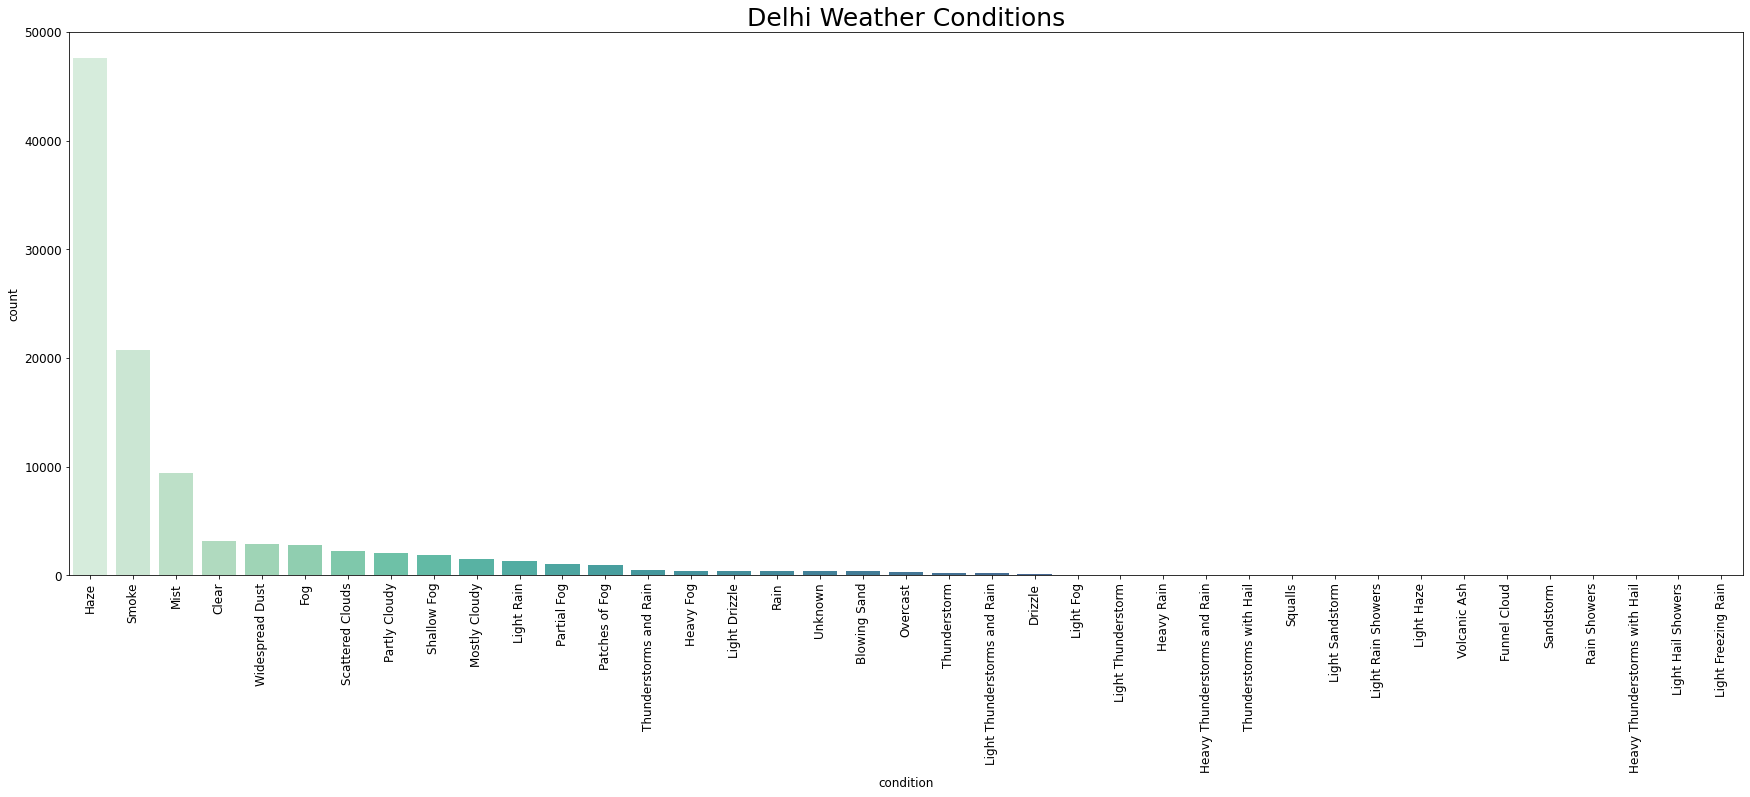

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Delhi Weather Conditions', fontsize=25)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
sns.countplot(x = "condition", data = weather, palette='mako_r', order=weather["condition"].value_counts().index)

Delhi weather conditions.

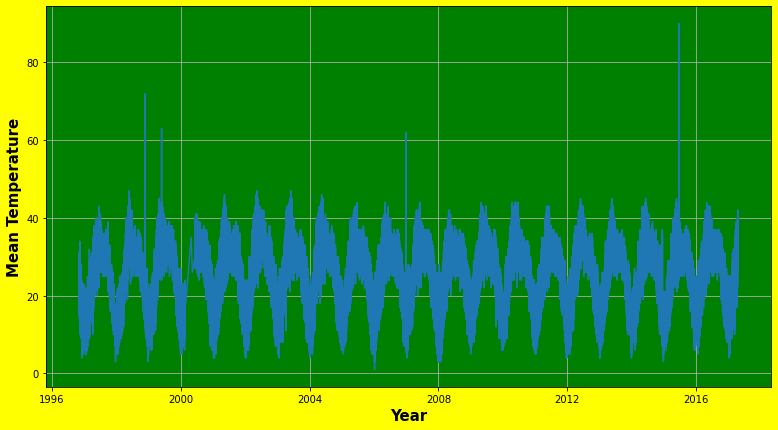

In [ ]:

fig=plt.figure(figsize=(13,7),facecolor="yellow")
ax = plt.axes()
ax.set_facecolor("green")
plt.xlabel("Year",fontsize="15",fontweight="bold")
plt.ylabel("Mean Temperature",fontsize="15",fontweight="bold")
plt.grid(True)
plt.plot(datetime_temp_data)
plt.show()

Visualization of the temperature on an yearly basis.

Following task : Visualizing the average temperature of days in a month(daily_mean) monthly mean(monthly_mean) in a year and hourly mean in a day.

In [ ]:
daily_mean=datetime_temp_data.groupby(datetime_temp_data.index.day).mean()
monthly_mean=datetime_temp_data.groupby(datetime_temp_data.index.month).mean()
hourly_mean=datetime_temp_data.groupby(datetime_temp_data.index.hour).mean()
yearly_mean=datetime_temp_data.groupby(datetime_temp_data.index.year).mean()

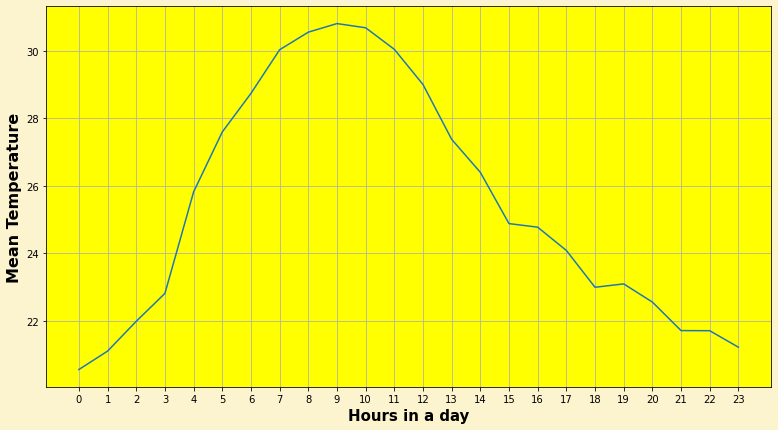

In [ ]:
fig=plt.figure(figsize=(13,7),facecolor="#FCF3CF")
ax=plt.axes()
ax.set_facecolor("yellow")
plt.plot(hourly_mean)
plt.grid(True)
plt.xticks(range(0,24))
plt.xlabel("Hours in a day",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

Visualization on a daily basis : The above plot below makes sense, the temperature rises during daytime and drops towards evening and morning.

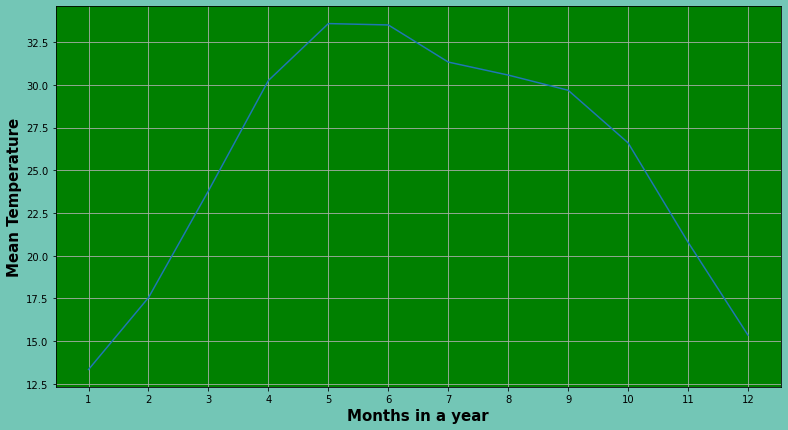

In [ ]:
fig=plt.figure(figsize=(13,7),facecolor="#73C6B6")
ax=plt.axes()
ax.set_facecolor("green")
plt.plot(monthly_mean)
plt.grid(True)
plt.xticks(range(1,13))
plt.xlabel("Months in a year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

Visualization of patterns on a monthy basis : The monthly_mean plot depicts that the avg temperature is highest during the summer season(March-July) and drops significantly in winter seasons.

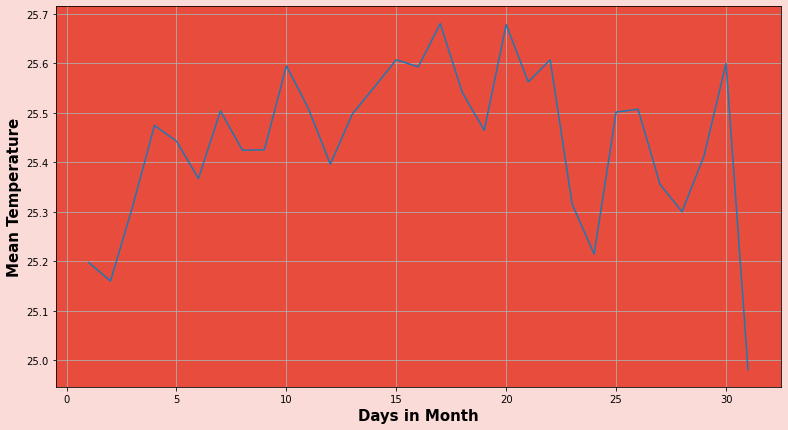

In [ ]:
fig=plt.figure(figsize=(13,7),facecolor="#FADBD8")
ax=plt.axes()
ax.set_facecolor("#E74C3C")
plt.plot(daily_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

Visualization of temperature on the basis of days in a month : There is no noticeable patterns in the days in month, because temperature varies in different days in different months.



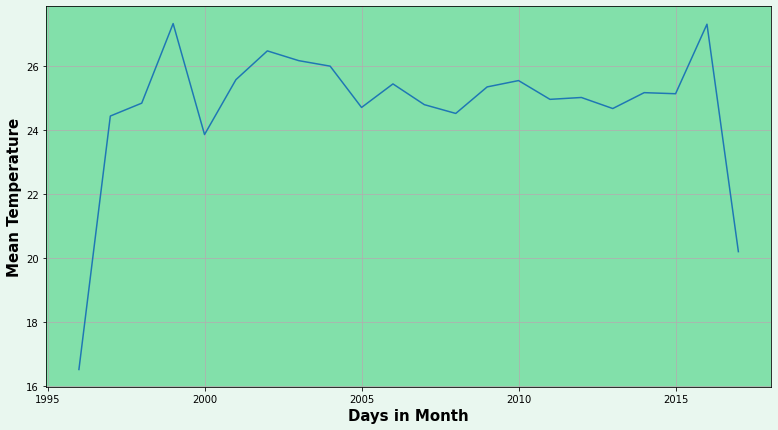

In [ ]:
fig=plt.figure(figsize=(13,7),facecolor="#E9F7EF")
ax=plt.axes()
ax.set_facecolor("#82E0AA")
plt.plot(yearly_mean)
plt.grid(True)
plt.xlabel("Days in Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.show()

Inference from plot : Delhi has experienced a sharp increase in average yearly temperature in late 1990s and have stabalized after 2002.

### Task 4 : ARIMA model

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
weather_df=pd.read_csv('testset.csv')
weather_df.head(5)

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
#data preprocessing, rename a few columns of interest to make it self-explanatory
weather_df = weather_df.rename(columns={' _conds': 'condition', ' _hum': 'humidity', ' _tempm': 'temperature'})
#convert utc time to human readable time and set it as index
weather_df['datetime_utc']=pd.to_datetime(weather_df['datetime_utc'],infer_datetime_format=True)
weather_df = weather_df.set_index('datetime_utc',inplace=False)
#view preprocessed data
weather_df.head()

,condition,_dewptm,_fog,_hail,_heatindexm,humidity,_precipm,_pressurem,_rain,_snow,temperature,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [ ]:
#since we are doing time series analysis (ARIMA), we shall drop humidty, etc
weather_time_df = weather_df[['temperature']]
weather_time_df.head()

,temperature
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


In [ ]:
#little preprocessing, we impute the missing temperature values with mean
weather_time_df=weather_time_df.resample('D').mean()
weather_time_df.fillna(weather_df['temperature'].mean(),inplace=True)
weather_time_df.head()

,temperature
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000


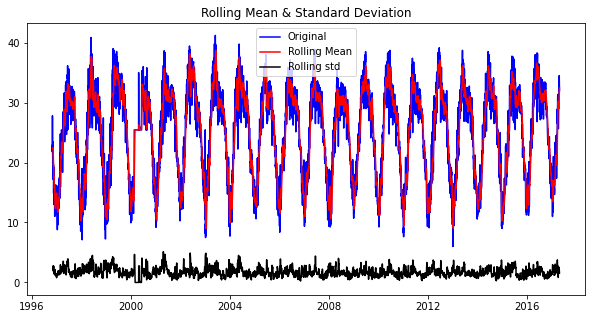

Results of Dickey Fuller Test:
Test Statistic                -7.373237e+00
p-value                        8.858479e-11
#Lags Used                     3.600000e+01
Number of Observations Used    7.443000e+03
Critical Value (1%)           -3.431229e+00
Critical Value (5%)           -2.861928e+00
Critical Value (10%)          -2.566977e+00
dtype: float64


In [ ]:
#let us plot the moving average model
movingAverage = weather_time_df.rolling(window=12).mean()
movingSTD = weather_time_df.rolling(window=12).std()
    
#Plot rolling statistics
plt.figure(figsize=(10,5))
plt.plot(weather_time_df, color='blue', label='Original')
plt.plot(movingAverage, color='red', label='Rolling Mean')
plt.plot(movingSTD, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
weather_test = adfuller(weather_time_df['temperature'], autolag='AIC')
dfoutput = pd.Series(weather_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in weather_test[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

From the above graph the mean values are correlating with the actual values and the standard deviation does not seem to vary. Also, Test statistic is less than Critical Values, so we already have STATIONARY Time Series. So our 'd' value will become 0 in ARIMA Model.

Plotting ARIMA model


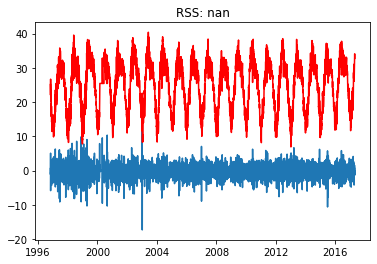

In [ ]:
#the ARIMA model
model = ARIMA(weather_time_df, order=(1,0,1))
results_ARIMA = model.fit(disp=-1)
plt.plot(weather_time_df.diff())
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - weather_time_df.diff()['temperature'])**2))
print('Plotting ARIMA model')

In [ ]:
#let us make the conclusions
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

datetime_utc
1996-11-01    25.114468
1996-11-02    22.413807
1996-11-03    22.856528
1996-11-04    22.068188
1996-11-05    22.630654
Freq: D, dtype: float64
datetime_utc
1996-11-01     25.114468
1996-11-02     47.528275
1996-11-03     70.384802
1996-11-04     92.452990
1996-11-05    115.083644
Freq: D, dtype: float64


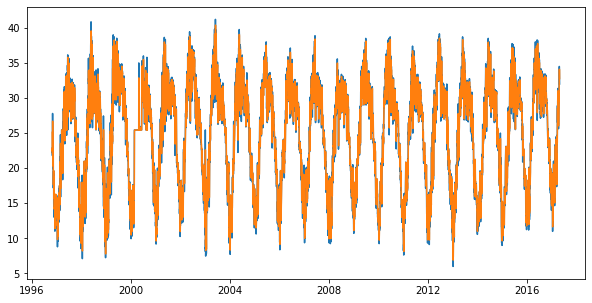

In [ ]:
#let us see the difference between predicted and actual values
plt.figure(figsize=(10,5))
plt.plot(weather_time_df)
plt.plot(predictions_ARIMA_diff)

From above graph plot, we can see that our predicted forecasts are very close to the real time series values. It also indicates a fairly accurate model.

### Task 5 : LSTM model

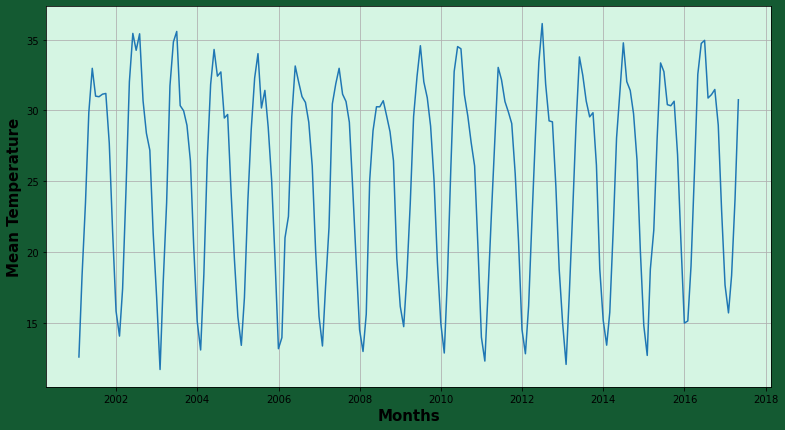

In [ ]:

monthly=daily.resample("M").mean()
fig=plt.figure(figsize=(13,7),facecolor="#145A32")
ax=plt.axes()
ax.set_facecolor("#D5F5E3")
plt.plot(monthly)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.show()

After analysing monthly data : 
resampled the daily data into monthly data.
As we can see the plot becomes more smoother than the daily data.

Components of Time Series Data:

1. Trend: A gradual increase or decrease increase in the of observations(mean & variance) over a long period of time.

2. Seasonality: Repeating/predictable pattern over a certain time period.

3. Residual: It is also called as the white noise, which generally are the errors which does not account to trend and seasonality.

I have decomposed monthly data and it shows clear seasonality in every 12 months and from 2002-2008 the monthly temperature decreases, however increases later.

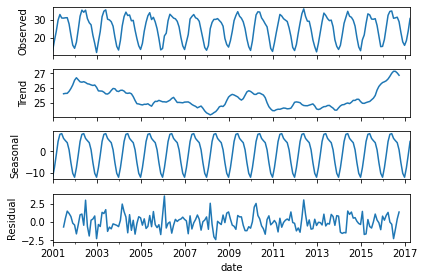

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(monthly)
result.plot()
plt.show()

I will now build a neural network, that will help us forecast the same temperature data

We have our train and test data ready, but to feed data into neural network it is highly recommended to transform data, for this purpose I have Normalized the data between 0-1, using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train=monthly["temp"][:"2015-01-01"].to_frame()
test=monthly["temp"]["2015-01-01":].to_frame()

train.shape,test.shape
train_scale=scaler.fit_transform(train)
test_scale=scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

(data prep) Once the data is scaled we will prepare data in such a way that using past 12 months it will help predict avg temperature the comming month.

keras TimeseriesGenerator helps builds the sequence without us having have to prepare data manually

Explanation:

TimeseriesGenerator takes arguments

data(data from where we generate sequence),

targets(data from where we generate targets),

length(time steps to consider for building sequnce)

In [ ]:
time_step=12
generator=TimeseriesGenerator(data=train_scale,
                              targets=train_scale,
                              length=time_step,
                              batch_size=1
                             )

Now data is ready and its time to build Neural Networks to feed in training data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam


Initialize sequentail model and Model Building and Model Compiling

In [ ]:
model=Sequential()
model.add(LSTM(100,activation="relu",input_shape=(time_step,1),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64,activation="relu"))
model.add(Dropout(0.01))

model.add(Dense(32))

model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="mean_squared_error",
              metrics=["mse"]
             )

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 12, 100)           40800     
                                                                 
 dropout_2 (Dropout)         (None, 12, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 85,153
Trainable params: 85,153
Non-trai

Set a call back for my model with patience=50

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(monitor="loss",patience=50)

fit model with training data

In [ ]:
model.fit(generator,epochs=200,steps_per_epoch=3,verbose=False,callbacks=[callback])

In [ ]:
#Visualizing loss per epoch, the loss is varying overtime but decreases significantly with increase in epoch

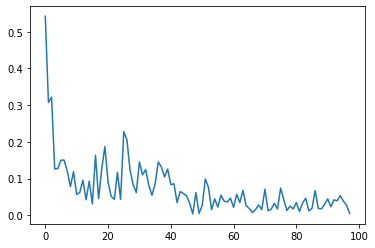

In [ ]:
loss_per_epoch=model.history.history["loss"]
plt.plot(loss_per_epoch)
plt.show()

Get the test prediction
Explanation:

As I have mentioned earlier we use past 12 months to get the temperature of present month, so to predict the temperature of first test month I have to use the last 12 months of traning data.

Since LSTM layer accpets 3-dim data i have reshaped the input data.

Once we get the prediction of first test month, I will append the predicted temperature with the 11 other temperatures(By removing the first month) of current_batch, & repeat this process will repeat until the length of test data.

In [ ]:
test_pred=[]

test_batch=train_scale[-time_step:]
current_batch=test_batch.reshape(1,time_step,1)

for i in range(len(test)):
    pred=model.predict(current_batch)[0]
    test_pred.append(pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[pred]],axis=1)

In [ ]:
test_pred

[array([0.24960095], dtype=float32),
 array([0.33475596], dtype=float32),
 array([0.461997], dtype=float32),
 array([0.60386914], dtype=float32),
 array([0.7227284], dtype=float32),
 array([0.8026894], dtype=float32),
 array([0.81563646], dtype=float32),
 array([0.81239706], dtype=float32),
 array([0.68998826], dtype=float32),
 array([0.50089633], dtype=float32),
 array([0.26256993], dtype=float32),
 array([0.20117925], dtype=float32),
 array([0.24630597], dtype=float32),
 array([0.32829276], dtype=float32),
 array([0.43614602], dtype=float32),
 array([0.5638108], dtype=float32),
 array([0.6932938], dtype=float32),
 array([0.8001093], dtype=float32),
 array([0.8521405], dtype=float32),
 array([0.80837065], dtype=float32),
 array([0.63657385], dtype=float32),
 array([0.4391421], dtype=float32),
 array([0.238855], dtype=float32),
 array([0.20875624], dtype=float32),
 array([0.24890772], dtype=float32),
 array([0.33092427], dtype=float32),
 array([0.44152132], dtype=float32),
 array([0.58

We have Normalized our data in range 0-1, so get the temperatures we will inverse transform the scaled data into its original scale

In [ ]:
true_pred=scaler.inverse_transform(test_pred)
test["pred"]=true_pred

We obtain a rmse of 3.69 which is higher that of SARIMAX model, however Neural Networks always provides room for model improvement,thus by using valid activation function and neurons this can be improved

In [ ]:
rmse=mean_squared_error(test["temp"],true_pred,squared=False)
rmse

3.3757813382898902

Plot showing traning testing and predicted temperature using LSTM

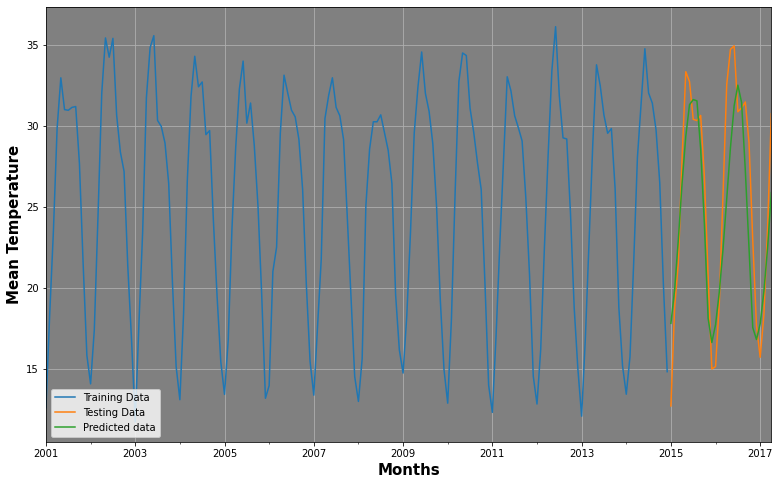

In [ ]:
ax=train["temp"].plot(label="Training Data",figsize=(13,8))
ax.set_facecolor("gray")
test["temp"].plot(label="Testing Data")
test["pred"].plot(label="Predicted data",ax=ax)
plt.grid(True)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.legend(loc="best")
plt.show()

### Task 6 : SARIMAX model 

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools
p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [ ]:
for pdq_params in pdq:
    for seasonal_params in seasonal_pdq:
        try:
            model=SARIMAX(weather_time_df,
                          order=pdq_params,
                          seasonal_order=seasonal_params
                         )
            result=model.fit()
            print("SARIMAX({}x{}12)-AIC:{}".format(pdq_params,
                                                   seasonal_params,
                                                   result.aic
                                                  ))
            
        except:
            continue

SARIMAX((0, 0, 0)x(0, 0, 0, 12)12)-AIC:70052.31738358599
SARIMAX((0, 0, 0)x(0, 0, 1, 12)12)-AIC:61283.2597120587
SARIMAX((0, 0, 0)x(0, 1, 0, 12)12)-AIC:40065.25754545575
SARIMAX((0, 0, 0)x(0, 1, 1, 12)12)-AIC:39923.83266557781
SARIMAX((0, 0, 0)x(1, 0, 0, 12)12)-AIC:40147.01929644471
SARIMAX((0, 0, 0)x(1, 0, 1, 12)12)-AIC:40013.235241753515
SARIMAX((0, 0, 0)x(1, 1, 0, 12)12)-AIC:39879.927543502316
SARIMAX((0, 0, 0)x(1, 1, 1, 12)12)-AIC:39849.50244982105
SARIMAX((0, 0, 1)x(0, 0, 0, 12)12)-AIC:60439.80006687467
SARIMAX((0, 0, 1)x(0, 0, 1, 12)12)-AIC:52906.92399622403
SARIMAX((0, 0, 1)x(0, 1, 0, 12)12)-AIC:36224.606713249974
SARIMAX((0, 0, 1)x(0, 1, 1, 12)12)-AIC:35712.92263743241
SARIMAX((0, 0, 1)x(1, 0, 0, 12)12)-AIC:36277.30112288983
SARIMAX((0, 0, 1)x(1, 0, 1, 12)12)-AIC:35786.690192255825
SARIMAX((0, 0, 1)x(1, 1, 0, 12)12)-AIC:35625.99261055597
SARIMAX((0, 0, 1)x(1, 1, 1, 12)12)-AIC:35627.80773142066
SARIMAX((0, 1, 0)x(0, 0, 0, 12)12)-AIC:29695.50431359218
SARIMAX((0, 1, 0)x(0, 0, 1, 

In [ ]:
model=SARIMAX(weather_time_df,
              order=(1,0,0),
              seasonal_order=(0,1,1,12)
             ).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        temperature   No. Observations:                 7480
Model:             SARIMAX(1, 0, 0)x(0, 1, 1, 12)   Log Likelihood              -14810.649
Date:                            Wed, 27 Apr 2022   AIC                          29627.299
Time:                                    05:53:20   BIC                          29648.054
Sample:                                11-01-1996   HQIC                         29634.427
                                     - 04-24-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9716      0.003    351.473      0.000       0.966       0.977
ma.S.L12      -0.9954      0.002   -511.102      0.000      -0.999      -0.992
sigma2         3.0678      0.029    104.675      0.000       3.010       3.125
===================================================================================
Ljung-Box (Q):                      335.72   Jarque-Bera (JB):              6012.06
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

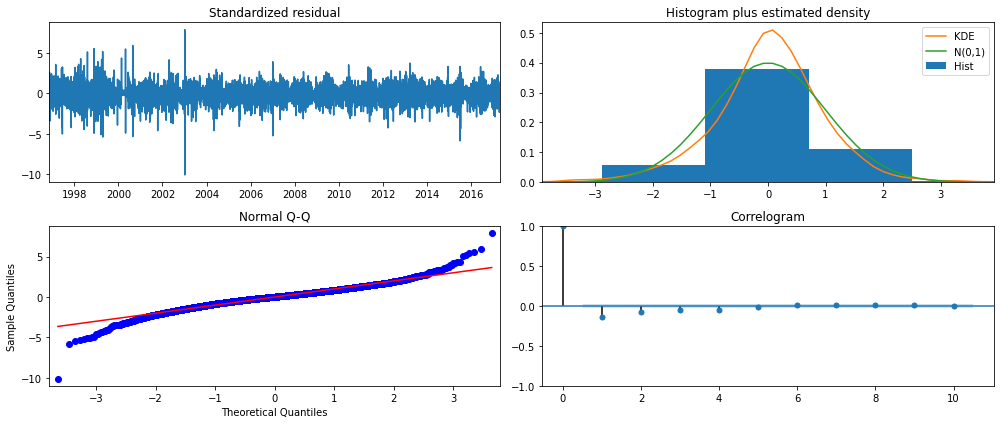

In [ ]:
model.plot_diagnostics(figsize=(14,6))
plt.tight_layout()
plt.show()

Thus, we have seen the results of the SARIMAX model.

### Task 7 : Predictive Analysis



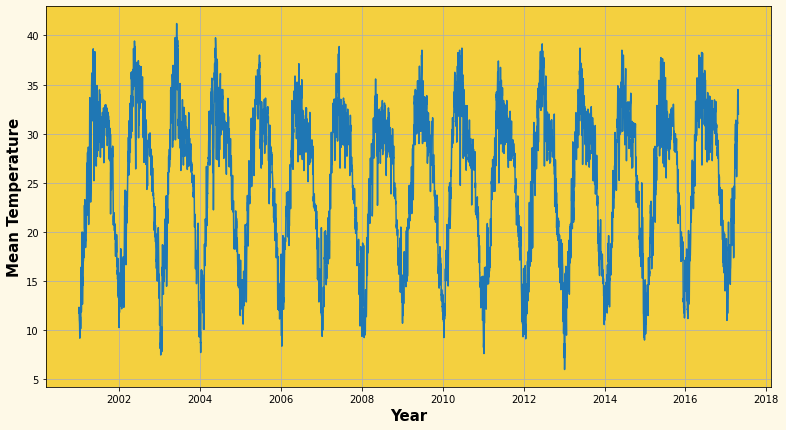

In [ ]:
fig=plt.figure(figsize=(13,7),facecolor="#FEF9E7")
ax=plt.axes()
ax.set_facecolor("#F4D03F")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.plot(daily)
plt.show()

Plotting the temperatures over the years.

**MA(Moving Average to predict daily temperature):**

Since there is minute difference in the temperature between consecutive days, I assumed that present days temperature will be equivalent to the average temperature of its preceding day.

So I have used current temperature as the temperature of its past one day and for that reason I have made a predicted temperature by shifting the dataframe by one row.

In [ ]:
actual=daily["temp"].to_frame().rename(columns={"temp":"actual"})
predicted=daily["temp"].to_frame().shift(1).rename(columns={"temp":"predicted"})

df_daily=pd.concat([actual,predicted],axis=1)
df_daily.head()


,actual,predicted
date,,
2001-01-01,11.750000,NaN
2001-01-02,12.333333,11.750000
2001-01-03,11.666667,12.333333
2001-01-04,11.208333,11.666667
2001-01-05,11.000000,11.208333


In [ ]:
#deleting the first row, as it contains an NaN
df_daily=df_daily[1:]

Next : To predict using the moving average method and plot it with actual data.

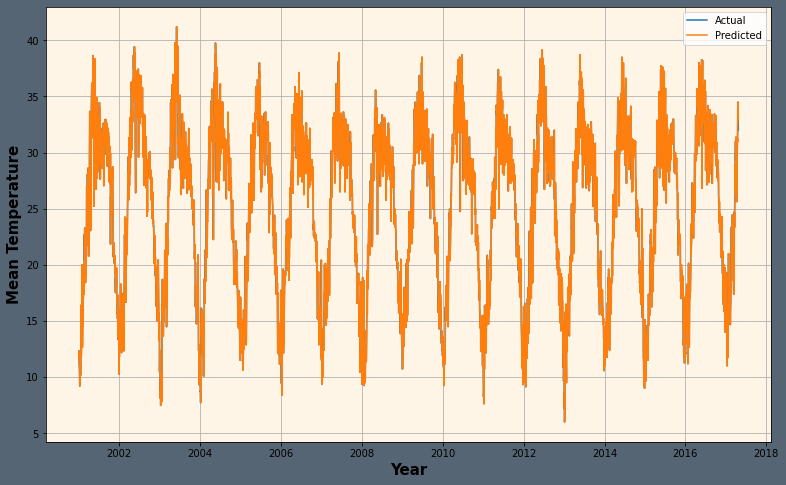

In [ ]:
fig=plt.figure(figsize=(13,8),facecolor="#566573")
ax=plt.axes()
ax.set_facecolor("#FEF5E7")
plt.plot(df_daily["actual"],label="Actual")
plt.plot(df_daily["predicted"],label="Predicted")
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

The blue line shows actual data and orange as predicted temperature, we can see that the plot is so identical and the forecasting is so precise.

#### Task 7.1 Validation 

In [ ]:
rmse=mean_squared_error(df_daily["actual"],df_daily["predicted"],squared=False)
print("RMSE: {:.1f}".format(rmse))

RMSE: 1.6


RMSE values accounts to 1.6, which is pretty good.

**Disadvantage of MA:**

Since the temperature of past as the temperature of future, in a long run my model will just be predicting same recorded temperatures, this is so Naive of MA model.

We know that for past decades we are experiencing a rise in temperature(global warming), and it will increase in the future, so for that reason we also have to take into account of exogenous features/variables, which MA neglects.

### Task 8 : Inferences 

Being the capital city of the world's largest democracy, Delhi is subject to year-round pollution. There are various levels of pollution, ranging from being caused by fine particulate dust(PM2.5 and PM10), each with their own harmful effects on human health.

There are an estimated 3.2 crore people living in Delhi, within an area of 1484 km^2, making the population density very high.

In this project, we did some exploratory data analysis from a time series point of view, and inferred the following -



*   The temperature levels peak around 9 AM in the morning, on a 24-hour scale. This can be attributed to the large number of vehicles plying on the road, and many people reaching workplaces in the traffic.

*   It also peaks around May-June in a yearly scale. This can be attributed due to the high temperatures the city experiences (typically 40 degree celsius and above). 

*   Delhi also experiences extreme climate, where summers are too hot and winters are too cold. This can be attributed to the distance of the city, from the ocean / coastline.

*   From the plots we saw above, we can see that there is seasonality but there no trend. Thus, on performing ADCF test, we see that the mean values are correlating with actual values and it does not vary much from the standard deviation.

*   We can also conclude from our plots that the average yearly temperature has increased after 1990s and stabilised after 2012. This can be attributed to Delhi being at the forefront of all activities in our country (capital city), after the Economic Liberalisation policy of early 1990s. After policies regarding climate and weather change were framed, the temperatures managed to stabilise.

*   From our ARIMA model, we conclude that the predicted forecasts are very close to the actual values, indicating towards a reasonably accurate model.

*   Though we were unable to unearth any obvious pattern from the residual plot of the SARIMAX model, we found that the KDE curve is similar to the normal distribution. The prediction worked well and provided good results on the test data. The RMSE score was 1.7, which is considered pretty good.

*   From the LSTM neural network, we observed that there is no obvious pattern in temperature between months, as different days in different months have varied temperatures.

*   The LSTM model has an RMSE of 3.69, which is higher than the SARIMAX model. Thus, there is a scope for improvement in neural networks, by modifying the activation functions, weights and / or biases.
